# Multiple Linear Regression Project using Advertising Dataset from ISLR

I have performed multiple linear regression in this project. 
The dataset consists of sales values based on TV, Radio and Newspaper advertisements in thousands. 
Here the target variable is Sales while the other variables form the predictor variable.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
plt.style.use('ggplot')

**Reading the dataset and checking its head and info**

In [2]:
advert = pd.read_csv('Advertising.csv',index_col=0)

In [3]:
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**A simple EDA with respect to sales based on the three media of advertisement**

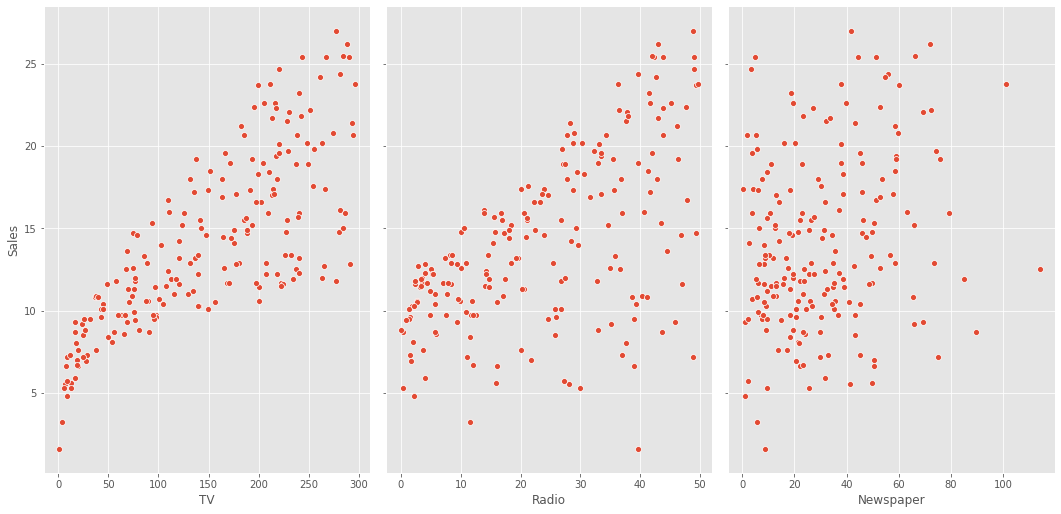

In [5]:
sns.pairplot(advert, x_vars=['TV','Radio','Newspaper'],y_vars='Sales',
            height = 7, aspect = 0.7)

We can potentially confirm that TV has the most linear relationship with the sales variable.


**Performing multiple linear regression on all three features to find our their coefficients**

In [6]:
from sklearn.linear_model import LinearRegression

X = advert[['TV','Radio','Newspaper']]
y = advert['Sales']

lm1 = LinearRegression()
lm1.fit(X , y)

print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
list(zip(['TV','Radio','Newspaper'],lm1.coef_))

[('TV', 0.04576464545539761),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

This means, for a given amount of TV and newspaper advertising, if we spend another 1000 dollars on radio, there will lead to an increase in 188 units in sales approximately.  

The value of Newspaper coefficient also suggest it has very low impact on sales

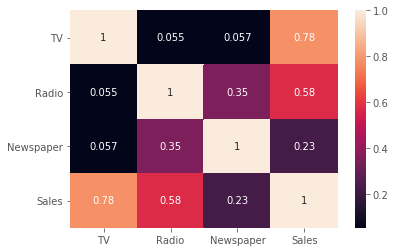

In [8]:
sns.heatmap(advert.corr(),annot=True)

### Feature Selection

Trying out various combinations of features and selecting the best R2 score

In [9]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV','Radio']],y)
lm2_pred = lm2.predict(X[['TV','Radio']])

print('R^2: ', r2_score(y , lm2_pred))

R^2:  0.8971942610828956


In [10]:
lm3 = LinearRegression().fit(X[['TV','Radio','Newspaper']],y)
lm3_pred = lm3.predict(X[['TV','Radio','Newspaper']])

print('R^2: ', r2_score(y , lm3_pred))

R^2:  0.8972106381789522


So adding newspaper to the features list only increases the R2 statistic by a very less value which further shows we can drop newspaper as one of the features and keeping newspaper might lead to overfitting and thus lead to poor results on independent test samples.


**Using train_test_split to perform predictions**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = advert[['TV','Radio','Newspaper']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression().fit(X_train,y_train)
lm4_pred = lm4.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,lm4_pred)))
print('R^2: ', r2_score(y_test,lm4_pred))

RMSE:  1.4046514230328955
R^2:  0.9156213613792232


In [12]:
X = advert[['TV','Radio']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression().fit(X_train,y_train)
lm5_pred = lm5.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,lm5_pred)))
print('R^2: ', r2_score(y_test,lm5_pred))

RMSE:  1.3879034699382888
R^2:  0.9176214942248908


The value of R^2 increases and RMSE decreases when Newspaper is dropped.

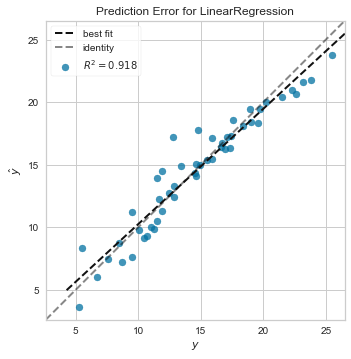

In [14]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visual1 = PredictionError(lm5).fit(X_train, y_train)
visual1.score(X_test,y_test)
visual1.poof()

### Interraction Effect

For this, we are goint to consider the interaction to be a product of TV and Radio.

In [15]:
advert['Interaction'] = advert['TV'] * advert['Radio']

X = advert[['TV','Radio', 'Interaction']]
y = advert['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression().fit(X_train,y_train)
lm6_pred = lm6.predict(X_test)

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,lm6_pred)))
print('R^2: ', r2_score(y_test,lm6_pred))

RMSE:  0.7011871137164326
R^2:  0.9789736814681261


The addition of interaction column has significantly increased R^2 value and decreased RMSE value from before and hence the model is more efficient in the presence of the interaction term.

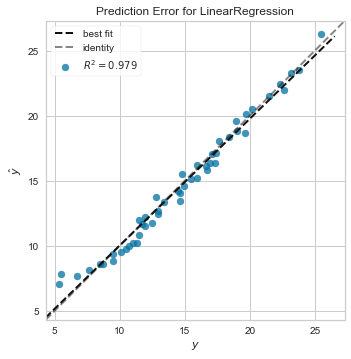

In [16]:
visual2 = PredictionError(lm6).fit(X_train, y_train)
visual2.score(X_test,y_test)
visual2.poof()